In [3]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

#데이터 다운로드
(train_data, train_labels), (test_data, test_labels)  = \
    tf.keras.datasets.imdb.load_data( num_words=1000)
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [6]:
#원-핫 인코딩으로 변환하는 함수 
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
            results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

In [10]:
#신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [11]:
#신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                   train_labels,
                   epochs=20,
                   batch_size=512,
                   validation_data=(test_data, test_labels),
                   verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5568 - accuracy: 0.7186 - val_loss: 0.4166 - val_accuracy: 0.8225 - 2s/epoch - 33ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3628 - accuracy: 0.8481 - val_loss: 0.3420 - val_accuracy: 0.8570 - 275ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3186 - accuracy: 0.8682 - val_loss: 0.3297 - val_accuracy: 0.8595 - 485ms/epoch - 10ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3073 - accuracy: 0.8725 - val_loss: 0.3308 - val_accuracy: 0.8589 - 485ms/epoch - 10ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3017 - accuracy: 0.8757 - val_loss: 0.3303 - val_accuracy: 0.8579 - 363ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2975 - accuracy: 0.8770 - val_loss: 0.3301 - val_accuracy: 0.8602 - 326ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2956 - accuracy: 0.8771 - val_loss: 0.3305 - val_accuracy: 0.8600 - 321ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2910 - accuracy: 0.8798 - val_loss: 0.3312 - val_accuracy: 0.8589 - 302ms/epoch - 6ms/step
Epoch 9/20
49/49

In [12]:
#훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)


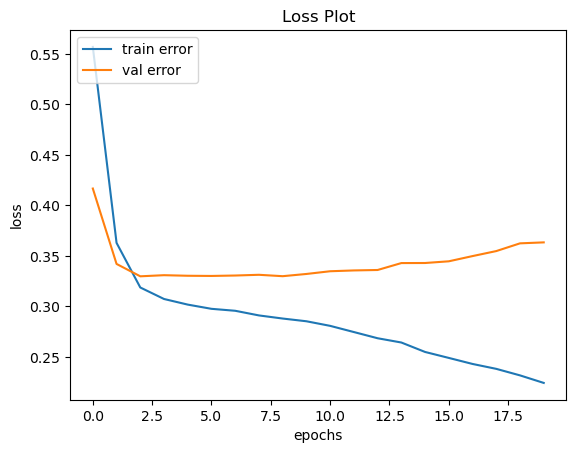

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()